# **STUDENT AI** - EDA
Exploratory Data Analysis

## Objectives

Conduct Exploratory analyis of the data to glean insights into how it might be used to solve the business case. Final objective is to identify significant variables to train the model on.

## Inputs

Cleaned Dataset from previous notebook.

## Outputs

None


### Install new libraries needed for EDA

In [56]:
!pip install pingouin
!pip install feature_engine

---

# Import required libraries

In [69]:
import os
import pandas as pd
import seaborn as sns
print(sns.__version__)
import numpy as np
import ppscore as pps
import pingouin as pg
import scipy.stats as stats
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from feature_engine import transformation as vt
from sklearn.pipeline import Pipeline

print('All Libraries Loaded')

# set default diagram size for matplotlib
plt.rcParams['figure.figsize'] = [3, 3]
colors = ['red', 'green', 'blue', 'orange', 'purple','yellow']

0.11.0
All Libraries Loaded


# Load Clean Dataset

### Set the working directory to notebook parent folder
If the output does not match, click **'clear all outputs'** and then **'restart'** the notebook. 
Then run cells from top to bottom.

In [4]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('If correct, Active Directory should read: /workspace/student-AI')
print(f"Active Directory: {current_dir}")

If correct, Active Directory should read: /workspace/student-AI
Active Directory: /workspace/student-AI


### Load cleaned dataset

In [5]:
df = pd.read_csv(f"outputs/dataset/Expanded_data_with_more_features_clean.csv")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,76,78,75


### Add mean score to be able to compare all 3 scores as a single value against the features

In [6]:
df['MeanScore'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1).round().astype(int)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MeanScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,71,74,72
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,90,88,82
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,93,91,90
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,5 - 10,45,56,42,48
4,male,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,76,78,75,76


## Individual Feature Analysis vs Target Variables (Math, Reading & Writing Score)

In [19]:
# define custom function to plot categorical variables based on column name
def plot_category_distribution(column):
    distribution = df[column].value_counts()
    distribution.plot(kind='bar', color=colors)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # print scores compared to teh given feature
    df_grouped = df.groupby([column])[['MathScore', 'ReadingScore', 'WritingScore', 'MeanScore']].agg(np.mean)
    df_sorted = df_grouped.sort_values(by='MeanScore', ascending=False)
    print(df_sorted)




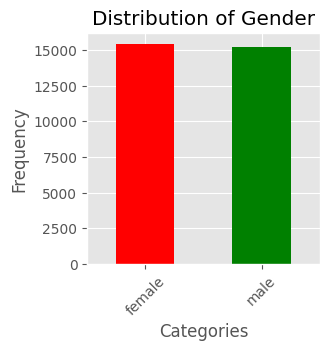

        MathScore  ReadingScore  WritingScore  MeanScore
Gender                                                  
female  64.080654     72.853216     72.856457  69.928683
male    69.069856     65.854571     63.920418  66.280147


In [20]:
plot_category_distribution('Gender')

#### The data is well balanced and shows that females have an overall better performance, but tend to have lower maths skills.
**I hypothesize that gender will not have a very large impact on the predicted score.**

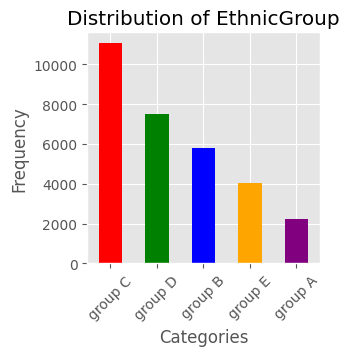

             MathScore  ReadingScore  WritingScore  MeanScore
EthnicGroup                                                  
group E      75.298936     74.251423     72.677060  74.074487
group D      67.666400     70.382247     70.890844  69.640944
group C      64.943811     68.517734     67.149294  66.873326
group B      63.490216     67.320460     65.895125  65.567285
group A      62.991888     66.787742     65.251915  65.000000


In [21]:
plot_category_distribution('EthnicGroup')

#### This data is not balanced as group C far outnumbers group A ... this will need to be adjusted prior to training the models, as it would unfarely give group C a higher significance in predicting the student performance.

Group E shows the highest mean score and is significantly better performing in school.<br>
Group A shows the least performance with a mean score almost 10% lower.<br>

**I hypothesize that Ethnic Group should have a significant influence on the predicted score.**

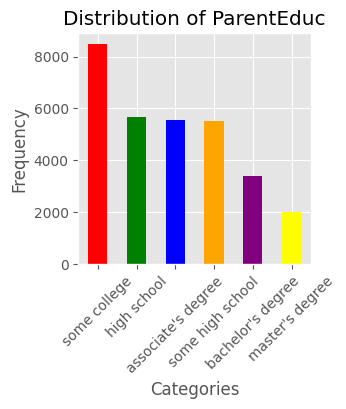

                    MathScore  ReadingScore  WritingScore  MeanScore
ParentEduc                                                          
master's degree     72.336134     75.832921     76.356896  74.839348
bachelor's degree   70.466627     73.062020     73.331069  72.281748
associate's degree  68.365586     71.124324     70.299099  69.931712
some college        66.445978     69.189667     68.456711  68.026303
high school         64.435731     67.213997     65.421136  65.692808
some high school    62.584013     65.510785     63.632409  63.907196


In [22]:
plot_category_distribution('ParentEduc')

#### This data is not balanced and will need to be adjusted prior to training the models, as it would unfarely give students with parents with some college higher emphasis in predicting the student performance.

Parents with a masters degree have the lowest frequency, but tend to have children that outperform all other students.

**I hypothesize that parental education should have a significant influence on the predicted score.**

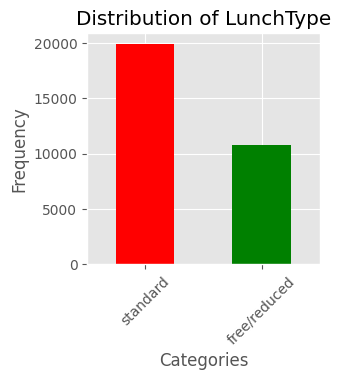

              MathScore  ReadingScore  WritingScore  MeanScore
LunchType                                                     
standard      70.709370     72.175634     71.529716  71.469982
free/reduced  58.862332     64.189735     62.650522  61.899683


In [23]:
plot_category_distribution('LunchType')

#### This data is not balanced and will need to be adjusted prior to training the models as it will bias the results towards students who receive a standard lunch.

Students who receive a lunch from their parents (standard) are on average 10% better then students who do not. This is a very generalized indicator of economic well being of the family.<br>
the assumption can be made that parents who do not need to rely on free school lunch programs can afford not only a bespoke lunch meal, but also other benficiary activities such as puchasing study guides, better access to internet / PCs, tutoring etc.

**I hypothesize that LunchType should have a significant influence on the predicted score.**

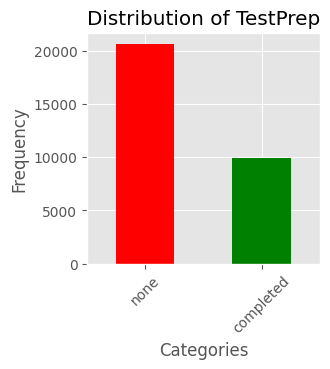

           MathScore  ReadingScore  WritingScore  MeanScore
TestPrep                                                   
completed  69.546660     73.732998     74.703265  72.662280
none       65.120323     67.281495     65.394180  65.929227


In [24]:
plot_category_distribution('TestPrep')

#### This data is not balanced and will need to be adjusted prior to training the models as it will bias the results towards students who did not complete their test prep studies.

Faily obviously, students who completed the test preparation perform  on average 7% better in the end.

**I hypothesize that TestPrep should have an influence on the predicted score.**

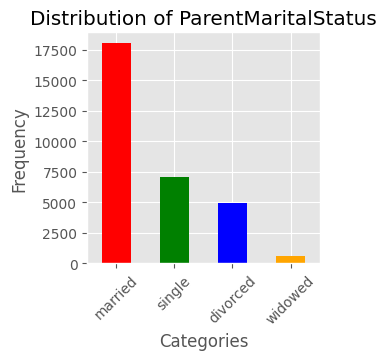

                     MathScore  ReadingScore  WritingScore  MeanScore
ParentMaritalStatus                                                  
widowed              67.368866     69.651438     68.563452  68.526227
divorced             66.691197     69.655011     68.799146  68.380972
married              66.650161     69.379561     68.406177  68.144006
single               66.165704     69.157250     68.174440  67.830210


In [25]:
plot_category_distribution('ParentMaritalStatus')

#### This data is not balanced and will need to be adjusted prior to training the models as it will bias the results towards students with married parents.
Also, students with widowed parents seem to be an outlier and might skew the data somewhat.

Based on the mean score, no significant influence of parental marital status can be determined. After confirmation I will likely drop this feature.

**I hypothesize that ParentMaritalStatus should have an no influence on the predicted score.**

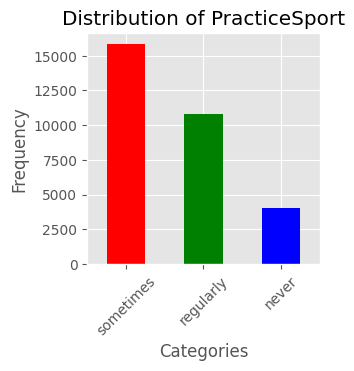

               MathScore  ReadingScore  WritingScore  MeanScore
PracticeSport                                                  
regularly      67.839155     69.943019     69.604003  69.128324
sometimes      66.289258     69.255112     68.090255  67.874968
never          64.171079     68.337662     66.522727  66.346653


In [26]:
plot_category_distribution('PracticeSport')

#### This data is not balanced and will need to be adjusted prior to training the models as it will bias the results towards students who sometimes do sports.

Based on the mean score, only a minor impact of sports can be determined. After confirmation I will likely drop this feature, unless other features aslone are not sufficient.

**I hypothesize that PracticeSport should have only minor influence on the predicted score.**

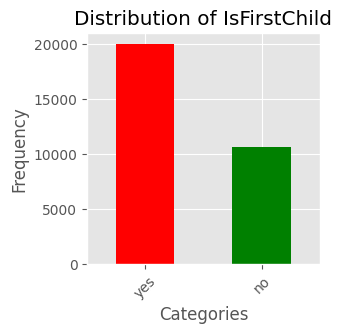

              MathScore  ReadingScore  WritingScore  MeanScore
IsFirstChild                                                  
yes           66.724507     69.508106     68.529371  68.253527
no            66.246832     69.132614     68.210887  67.860160


In [27]:
plot_category_distribution('IsFirstChild')

#### This data is not balanced and will need to be adjusted prior to training the models as it will bias the results towards students who are the first child.

Based on the mean score, only a minor impact of being first child can be determined. After confirmation I will likely drop this feature, unless other features aslone are not sufficient.

**I hypothesize that IsFirstChild should have only minor influence on the predicted score.**

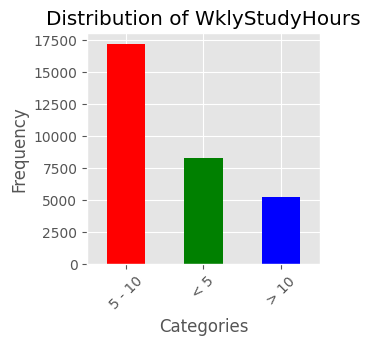

                MathScore  ReadingScore  WritingScore  MeanScore
WklyStudyHours                                                  
> 10            68.696655     70.365436     69.777778  69.613995
5 - 10          66.859078     69.654148     68.643800  68.384629
< 5             64.580359     68.176135     67.090192  66.611920


In [28]:
plot_category_distribution('WklyStudyHours')

#### This data is not balanced and will need to be adjusted prior to training the models as it will bias the results towards students who study between 5-10 hours.

Based on the mean score, students who study more than 10h per week have on average 3% better score than student who study <5 hours. This is also not a very signigicant difference. A small biad towards mathematics can be seen 4% difference vs 2 or 3 .. indicating that particularly Maths benefits from extra study time.

**I hypothesize that StudyHours should have only minor influence on the predicted score.**

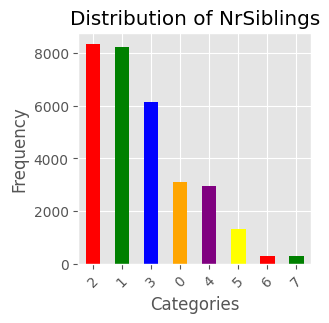

            MathScore  ReadingScore  WritingScore  MeanScore
NrSiblings                                                  
7           67.615120     69.828179     68.986254  68.821306
0           66.819449     69.547812     68.746515  68.369854
3           66.719092     69.488159     68.650498  68.285971
2           66.512557     69.425257     68.441402  68.121382
5           66.630303     69.453788     68.282576  68.119697
1           66.473896     69.259097     68.245345  67.993185
4           66.245495     69.144169     68.073444  67.816729
6           65.917219     68.801325     67.860927  67.562914


In [111]:
plot_category_distribution('NrSiblings')

#### This data is not balanced.

Based on the mean score, there is practically no difference between being an only child (0) or having 7 siblings ... this indicates that this feature has no bearing on the overall student performance and can be dropped.

**I hypothesize that NrSiblings has NO influence on the predicted score.**

## Assess distribution of numerical data

In [110]:
summaries_dict = {}

for column in columns:
    summary = df[column].describe()
    summaries_dict[column] = summary

# Convert the dictionary of summaries into a DataFrame
summaries_df = pd.DataFrame(summaries_dict)

# Display DataFrames
print(summaries_df)

          MathScore  ReadingScore  WritingScore     MeanScore
count  30641.000000  30641.000000  30641.000000  30641.000000
mean      66.558402     69.377533     68.418622     68.116739
std       15.361616     14.758952     15.443525     14.456619
min        0.000000     10.000000      4.000000      9.000000
25%       56.000000     59.000000     58.000000     58.000000
50%       67.000000     70.000000     69.000000     68.000000
75%       78.000000     80.000000     79.000000     79.000000
max      100.000000    100.000000    100.000000    100.000000


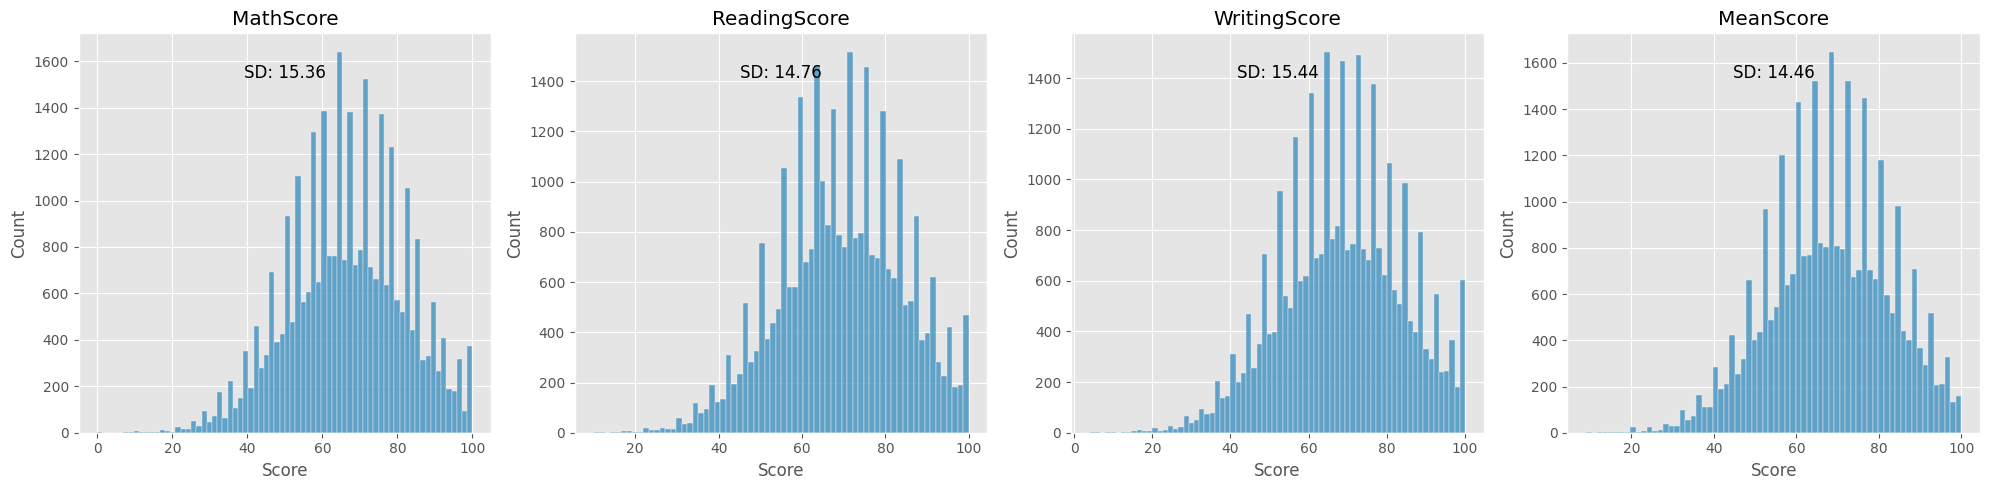

In [97]:

columns = ['MathScore', 'ReadingScore', 'WritingScore','MeanScore']

plt.figure(figsize=(20, 5))

for i, column in enumerate(columns, start=1):
    plt.subplot(1, 4, i) 
    sns.histplot(df[column], fill=True)
    plt.title(column)
    plt.xlabel('Score')
    plt.ylabel('Count')
    
    #add standard deviation to plots
    std_dev = df[column].std()
    plt.text(x=0.5, y=0.9, s=f'SD: {std_dev:.2f}', 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()

### Create a subplot of KDE diagrams to visualize density/concentration of data

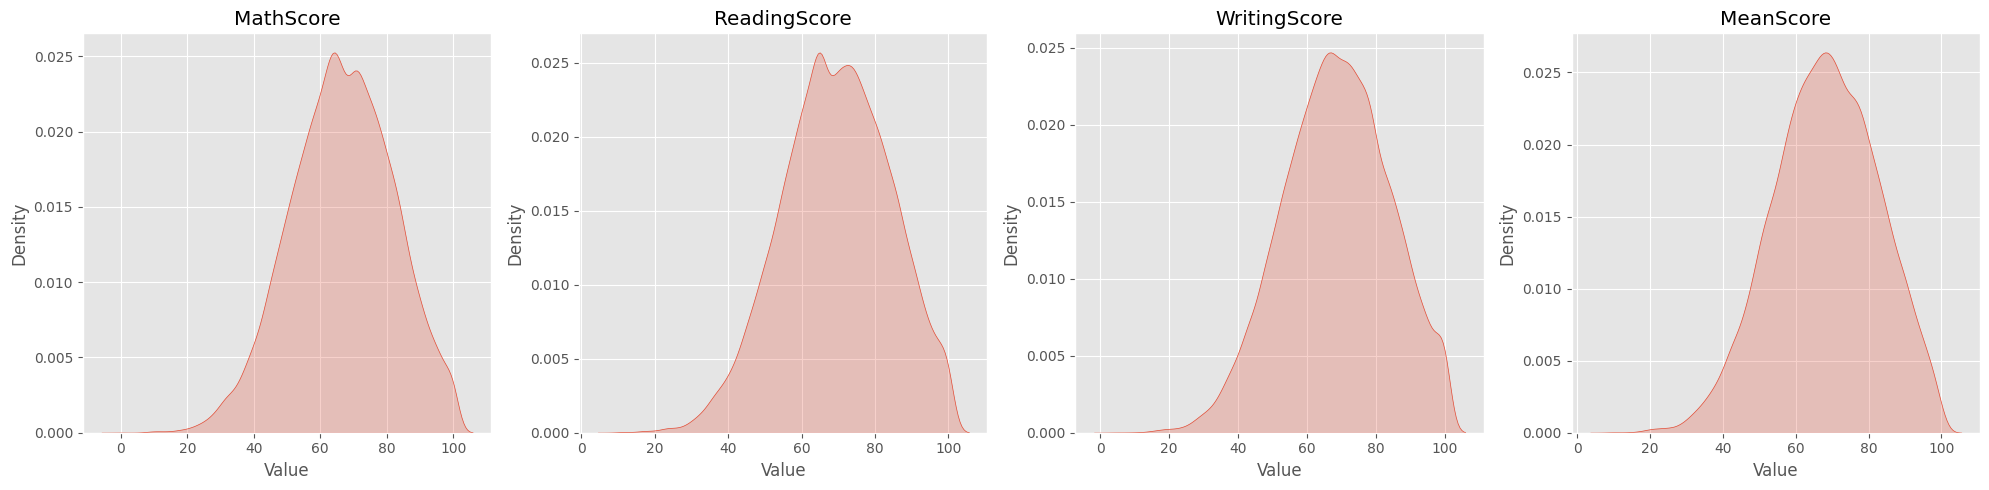

In [89]:
plt.figure(figsize=(20, 5))

for i, column in enumerate(columns, start=1):
    plt.subplot(1, 4, i) 
    sns.kdeplot(df[column], fill=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


### Visually the data seems to follow a standard 'bell curve' and appears normally distributed, which is very helpful for model fitting.
A standard deviation of 15 indicates the students performance are reasonably close to the mean grade. To further analyse the normal distribution I will plot QQ diagrams below:

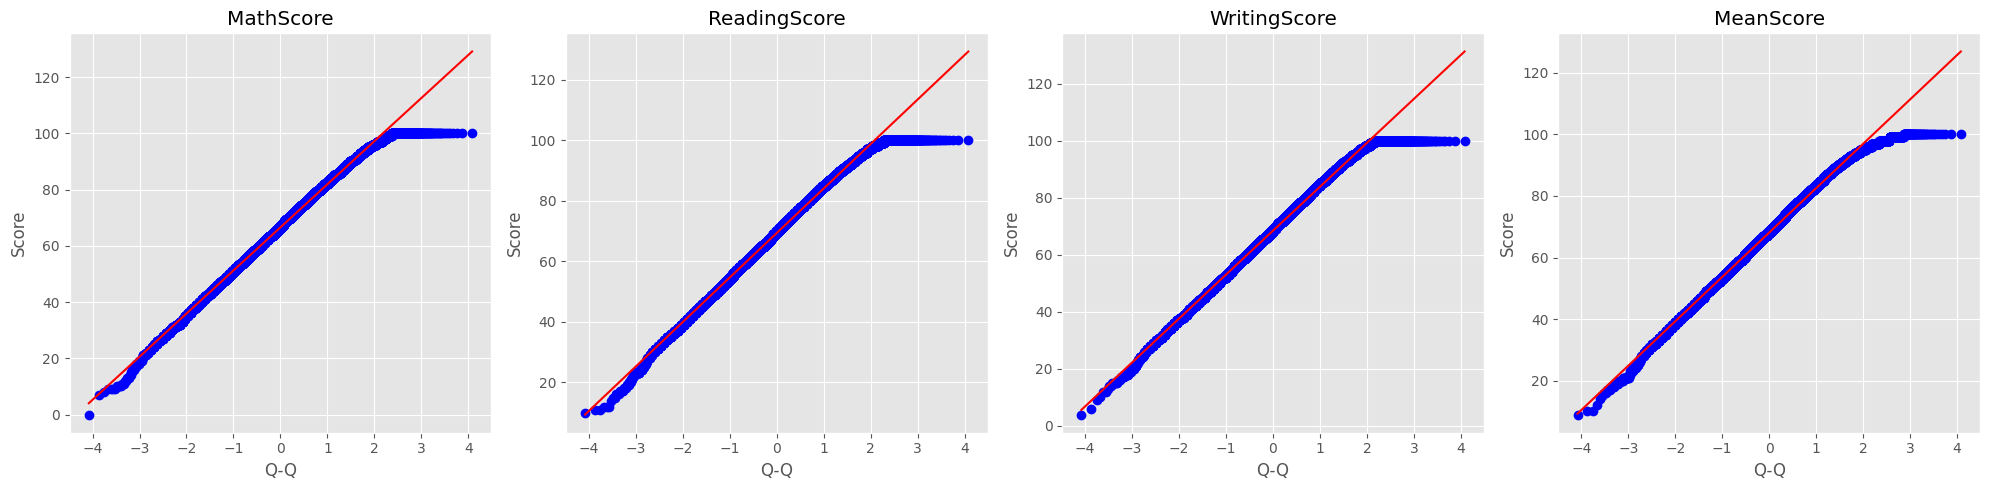

In [100]:
plt.figure(figsize=(20, 5))

for i, column in enumerate(columns, start=1):
    plt.subplot(1, 4, i) 
    data = df[column]
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(column)
    plt.xlabel('Q-Q')
    plt.ylabel('Score')

plt.tight_layout()
plt.show()

#### The QQ plots are very closely aligned to the diagonal indicating an almost perfect normal distribution. The values flatten off at exctly 100 which is the maximum score. At the lowest end the data strays from the line a little, but in this case a student will already be flagged as being at risk.